# Text detection with EAST

- Original paper: https://arxiv.org/pdf/1704.03155v2.pdf

# Importing the libraries

In [22]:
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression
import matplotlib.pyplot as plt

# Pre-processing the image

In [23]:
detector = 'Models/frozen_east_text_detection.pb'
width, height = 320, 320
image = 'Images/cup.jpg'
min_confidence = 0.9


(np.float64(-0.5), np.float64(749.5), np.float64(479.5), np.float64(-0.5))

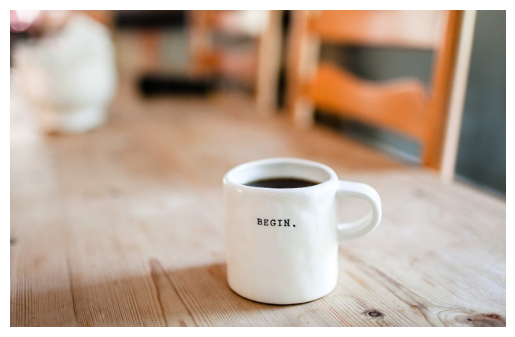

In [25]:
img_original= cv2.imread(image)
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

In [26]:
original = img.copy()

In [27]:
img.shape

(480, 750, 3)

In [28]:
H = img.shape[0]
W = img.shape[1]
print(H, W)

480 750


In [29]:
proportion_W = W / float(width)
proportion_H = H / float(height)
print(proportion_W, proportion_H)

2.34375 1.5


In [30]:
img = cv2.resize(img, (width, height))
H = img.shape[0]
W = img.shape[1]
print(H, W)

320 320


(np.float64(-0.5), np.float64(319.5), np.float64(319.5), np.float64(-0.5))

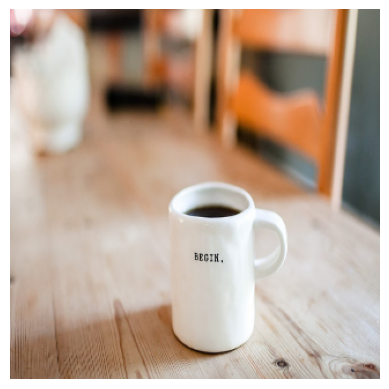

In [31]:
plt.imshow(img)
plt.axis("off")

# Loading the neural network

In [32]:
layers_names = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']

In [33]:
neural_network = cv2.dnn.readNet(detector)

In [34]:
img.shape

(320, 320, 3)

In [35]:
blob = cv2.dnn.blobFromImage(img, 1.0, (W, H), swapRB = True, crop = False)

In [36]:
blob.shape # batch size

(1, 3, 320, 320)

In [37]:
neural_network.setInput(blob)
scores, geometry = neural_network.forward(layers_names)

In [38]:
scores

array([[[[5.3572836e-07, 1.7140557e-06, 2.9456417e-06, ...,
          1.1968153e-06, 4.1100449e-07, 2.7098151e-06],
         [8.7792029e-07, 3.9263566e-07, 8.0762345e-07, ...,
          1.7104371e-06, 6.8723881e-07, 3.1402665e-06],
         [1.7403191e-06, 1.8301078e-07, 5.5320985e-08, ...,
          2.5227134e-06, 2.5203397e-07, 3.5895048e-06],
         ...,
         [3.0739952e-07, 5.1487928e-07, 6.8883986e-07, ...,
          1.9272891e-06, 6.6844672e-07, 4.7066701e-06],
         [3.9333611e-07, 1.6186144e-07, 4.8851479e-07, ...,
          1.1732159e-06, 9.4240005e-07, 4.6891832e-06],
         [8.0203897e-08, 1.2365507e-08, 1.5583774e-08, ...,
          3.7266960e-07, 4.9089988e-07, 1.4271816e-07]]]], dtype=float32)

In [ ]:
geometry

array([[[[ 1.54848892e+02,  1.01938652e+02,  1.08211067e+02, ...,
           1.33965744e+02,  1.27577377e+02,  1.46967911e+02],
         [ 1.19407845e+02,  6.46942062e+01,  7.18581467e+01, ...,
           9.02676239e+01,  8.52865753e+01,  1.03320236e+02],
         [ 1.22548698e+02,  6.90612106e+01,  7.86800232e+01, ...,
           1.06370026e+02,  1.01670258e+02,  1.14973625e+02],
         ...,
         [ 1.16457443e+02,  4.99968452e+01,  3.75178909e+01, ...,
           8.21259766e+01,  8.12639771e+01,  1.21695587e+02],
         [ 1.27623566e+02,  5.88201637e+01,  4.84035950e+01, ...,
           8.31772385e+01,  8.09339981e+01,  1.11183853e+02],
         [ 1.26661636e+02,  7.53631363e+01,  6.93250504e+01, ...,
           1.27025375e+02,  1.18697914e+02,  1.47223694e+02]],

        [[ 1.09559792e+02,  9.52129364e+01,  9.08699570e+01, ...,
           1.00495560e+02,  9.43882065e+01,  1.12618568e+02],
         [ 8.27181702e+01,  5.77867126e+01,  5.62353210e+01, ...,
           6.53349457e

In [39]:
geometry[0,0]

array([[157.27147 , 107.95573 , 119.14988 , ..., 126.30404 , 121.00041 ,
        149.05763 ],
       [121.49669 ,  66.58814 ,  71.20531 , ...,  85.633095,  82.30279 ,
        107.46291 ],
       [128.13919 ,  70.34233 ,  77.485435, ...,  91.72433 ,  91.19144 ,
        115.21651 ],
       ...,
       [127.03762 ,  78.66446 ,  77.93083 , ...,  83.820496,  82.3107  ,
        122.925644],
       [136.49353 ,  88.08435 ,  90.81946 , ...,  85.0911  ,  81.29863 ,
        112.69708 ],
       [149.69324 , 103.65268 , 101.41519 , ..., 132.95056 , 122.891655,
        149.97635 ]], dtype=float32)

In [40]:
scores.shape

(1, 1, 80, 80)

In [41]:
scores.shape[2:4]

(80, 80)

In [42]:
rows, columns = scores.shape[2:4]
print(rows, columns)

80 80


In [43]:
boxes = []
confidences = []

# Decoding the values

- Explanation about geometry: https://stackoverflow.com/questions/55583306/decoding-geometry-output-of-east-text-detection

In [44]:
def geometric_data(geometry, y):
  xData0 = geometry[0, 0, y]
  xData1 = geometry[0, 1, y]
  xData2 = geometry[0, 2, y]
  xData3 = geometry[0, 3, y]
  angles_data = geometry[0, 4, y]
  return angles_data, xData0, xData1, xData2, xData3

In [45]:
def geometric_calculation(angles_data, xData0, xData1, xData2, xData3):
  (offsetX, offsetY) = (x * 4.0, y * 4.0)
  angle = angles_data[x]
  cos = np.cos(angle)
  sin = np.sin(angle)
  h = xData0[x] + xData2[x]
  w = xData1[x] + xData3[x]

  endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
  endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))

  beginX = int(endX - w)
  beginY = int(endY - h)

  return beginX, beginY, endX, endY

In [46]:
rows, columns

(80, 80)

In [47]:
scores

array([[[[5.3572836e-07, 1.7140557e-06, 2.9456417e-06, ...,
          1.1968153e-06, 4.1100449e-07, 2.7098151e-06],
         [8.7792029e-07, 3.9263566e-07, 8.0762345e-07, ...,
          1.7104371e-06, 6.8723881e-07, 3.1402665e-06],
         [1.7403191e-06, 1.8301078e-07, 5.5320985e-08, ...,
          2.5227134e-06, 2.5203397e-07, 3.5895048e-06],
         ...,
         [3.0739952e-07, 5.1487928e-07, 6.8883986e-07, ...,
          1.9272891e-06, 6.6844672e-07, 4.7066701e-06],
         [3.9333611e-07, 1.6186144e-07, 4.8851479e-07, ...,
          1.1732159e-06, 9.4240005e-07, 4.6891832e-06],
         [8.0203897e-08, 1.2365507e-08, 1.5583774e-08, ...,
          3.7266960e-07, 4.9089988e-07, 1.4271816e-07]]]], dtype=float32)

In [48]:
for y in range(0, rows):
  #print(y)
  data_scores = scores[0, 0, y]
  angles_data, xData0, xData1, xData2, xData3 = geometric_data(geometry, y)
  #print(data_scores)
  #print('-------')
  #print(angles_data, xData0, xData1, xData2, xData3)
  for x in range(0, columns):
    if data_scores[x] < min_confidence:
      continue

    beginX, beginY, endX, endY = geometric_calculation(angles_data, xData0, xData1, xData2, xData3)
    confidences.append(data_scores[x])
    boxes.append((beginX, beginY, endX, endY))

In [49]:
confidences

[np.float32(0.999605),
 np.float32(0.9998317),
 np.float32(0.9997712),
 np.float32(0.9994646),
 np.float32(0.94998664),
 np.float32(0.9909826),
 np.float32(0.9996872),
 np.float32(0.99981195),
 np.float32(0.9996339)]

In [50]:
boxes

[(155, 208, 189, 220),
 (156, 208, 186, 220),
 (156, 208, 185, 220),
 (156, 207, 185, 220),
 (155, 207, 187, 221),
 (157, 208, 188, 220),
 (157, 208, 187, 220),
 (157, 208, 187, 221),
 (156, 208, 188, 221)]

In [51]:
detections = non_max_suppression(np.array(boxes), probs = confidences)

In [52]:
detections

array([[156, 208, 186, 220]])

In [53]:
proportion_H, proportion_W

(1.5, 2.34375)

(np.float64(-0.5), np.float64(749.5), np.float64(479.5), np.float64(-0.5))

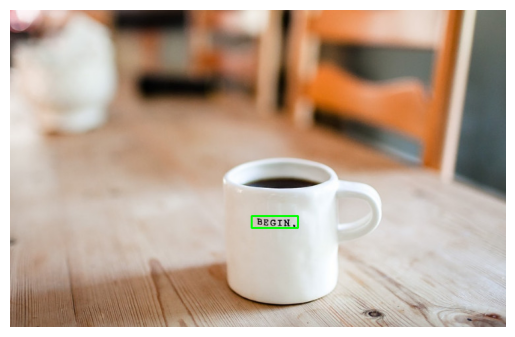

In [58]:
img_copy = original.copy()
for (beginX, beginY, endX, endY) in detections:
  #print(beginX, beginY, endX, endY)
  beginX = int(beginX * proportion_W)
  beginY = int(beginY * proportion_H)
  endX = int(endX * proportion_W)
  endY = int(endY * proportion_H)

  # region of interest
  roi = img_copy[beginY:endY, beginX:endX]

  cv2.rectangle(original, (beginX, beginY), (endX, endY), (0,255,0), 2)
plt.imshow(original)
plt.axis("off")

(np.float64(-0.5), np.float64(69.5), np.float64(17.5), np.float64(-0.5))

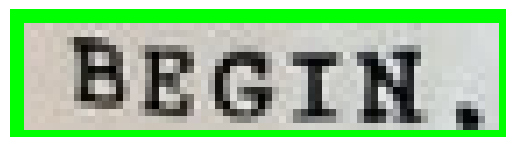

In [59]:
plt.imshow(roi)
plt.axis("off")

(np.float64(-0.5), np.float64(104.5), np.float64(26.5), np.float64(-0.5))

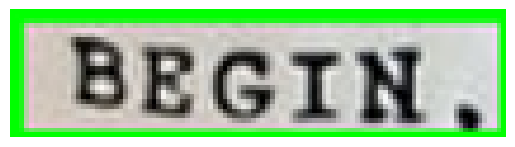

In [60]:
roi = cv2.resize(roi, None, fx = 1.5, fy = 1.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(roi)
plt.axis("off")

# Text recognition

In [61]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract
import pytesseract

In [ ]:
# !mkdir tessdata
# !wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
# !wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [62]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [63]:
config_tesseract = "--tessdata-dir tessdata --psm 7"

BEGIN .,



(np.float64(-0.5), np.float64(749.5), np.float64(479.5), np.float64(-0.5))

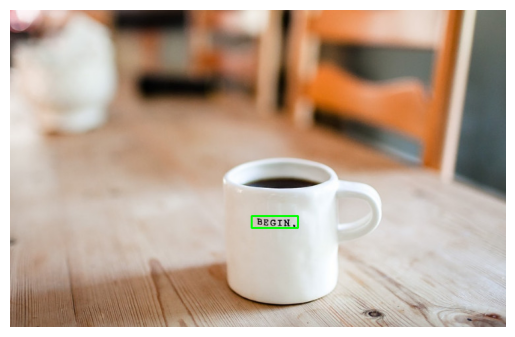

In [65]:
img_copy = original.copy()
for (beginX, beginY, endX, endY) in detections:
  beginX = int(beginX * proportion_W)
  beginY = int(beginY * proportion_H)
  endX = int(endX * proportion_W)
  endY = int(endY * proportion_H)

  roi = img_copy[beginY:endY, beginX:endX]
  text = pytesseract.image_to_string(roi, lang = 'eng', config=config_tesseract)
  print(text)

  cv2.rectangle(original, (beginX, beginY), (endX, endY), (0,255,0), 2)
plt.imshow(original)
plt.axis("off")

## Expanding the ROI

BEGIN ]



(np.float64(-0.5), np.float64(749.5), np.float64(479.5), np.float64(-0.5))

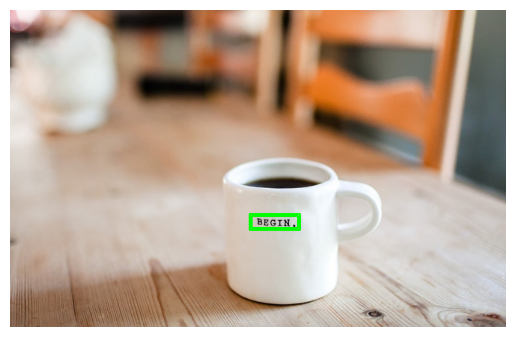

In [69]:
margin = 3
img_copy = original.copy()
for (beginX, beginY, endX, endY) in detections:
  beginX = int(beginX * proportion_W)
  beginY = int(beginY * proportion_H)
  endX = int(endX * proportion_W)
  endY = int(endY * proportion_H)

  roi = img_copy[beginY - margin:endY + margin, beginX - margin:endX + margin]
  plt.imshow(roi)
  text = pytesseract.image_to_string(roi, lang = 'eng', config=config_tesseract)
  print(text)

  cv2.rectangle(img_copy, (beginX - margin, beginY - margin), (endX + margin, endY + margin), (0,255,0), 2)
plt.imshow(img_copy)
plt.axis("off")

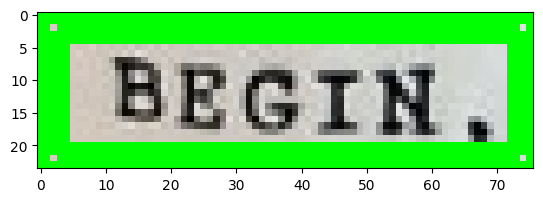

In [70]:
 plt.imshow(roi)